## <u>Graph Puzzle - Number Tree</u>
#### The puzzle is in the form of an undirected tree graph with N nodes, with the following characteristics:
● Each nodes are given a number from 1 to N

● Each edges have a single digit integer written in it

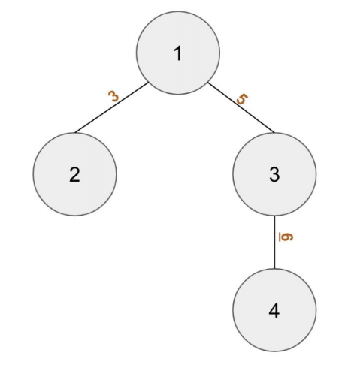

The value of a path IS defined as the concatenation of the number written in the edges of the path, starting from the node with lower number. 

For example, in the example above, the value from node 2 to node 3 is 35, and value from node 2 to node 4 is 356. Then, the puzzle is calculating the sum of value from each possible path in the tree.

#### <u>Input</u>
The first line contains 1 integer N (1 ≤ N ≤ 100,000), denoting the number of nodes.<br></br>
The next N-1 line contains Ui Vi Ci (1 ≤ Ui, Vi ≤ N, 0 ≤ Ci ≤ 9), denoting an edge between node Ui and node Vi which has number Ci written in it. <br></br>
It is guaranteed that the given graph is a tree graph.

#### <u>Output</u>
One line containing a single integer, the answer of this puzzle. Since this number can be very large, output its value modulo 109+7.

#### <u>Example</u>
The tree corresponds to the tree given in the description above.<br></br>
Below are all the possible values:<br></br>
1. From node 1 to node 2 = 3 
2. From node 1 to node 3 = 5
3. From node 1 to node 4 = 56
4. From node 2 to node 3 = 35
5. From node 2 to node 4 = 356
6. From node 3 to node 4 = 6

The sum of all of them is 461.

#### <u>Sample Input</u>
4 <br></br>
1 2 3 <br></br>
1 3 5 <br></br>
3 4 6 <br></br>

#### <u>Sample Output</u>
461

In [72]:
from collections import defaultdict

In [78]:
nb_nodes = int(input("Input number of nodes: "))
graph = defaultdict(list)  # { node: [adjacent_node] }
edges = defaultdict(dict)  # { node: {adjacent_node:edge value} }
puzzle_answer = defaultdict(list) 

for N in range(nb_nodes-1):
    u, v, e = map(int, input().split()) 
    graph[u].append(v)
    graph[v].append(u)
    edges[u].update({v:e})
    edges[v].update({u:e})

print("Graph: ")
print(graph)
print()
print("Edges")
print(edges)

Input number of nodes: 10
1 2 3
1 3 5
3 4 6
2 5 8
3 6 9
5 7 9
7 8 9
8 9 0
8 10 2
Graph: 
defaultdict(<class 'list'>, {1: [2, 3], 2: [1, 5], 3: [1, 4, 6], 4: [3], 5: [2, 7], 6: [3], 7: [5, 8], 8: [7, 9, 10], 9: [8], 10: [8]})

Edges
defaultdict(<class 'dict'>, {1: {2: 3, 3: 5}, 2: {1: 3, 5: 8}, 3: {1: 5, 4: 6, 6: 9}, 4: {3: 6}, 5: {2: 8, 7: 9}, 6: {3: 9}, 7: {5: 9, 8: 9}, 8: {7: 9, 9: 0, 10: 2}, 9: {8: 0}, 10: {8: 2}})


**For each node, n, find all paths to all other nodes, j for j < n**

In [74]:
def find_paths(graph, start, end, path=[]): 
    """
    This function returns the path between any two nodes
    """
    #print("Function Execution")
    #print("Current Node: " + str(start))
    path = path + [start] 
    #print("Current Path: " + str(path))
        
    if start == end: 
        return path
    
    paths = []
    for node in graph[start]:
        if node not in path:
            newpaths = find_paths(graph, node, end, path)
            
            for newpath in newpaths:
                paths.append(newpath)
    return paths

# puzzle_answer[1] = []
# puzzle_answer[1].append(find_paths(graph,1,5,[]))
# puzzle_answer[1].append(find_paths(graph,1,2,[]))
# puzzle_answer[1].append(find_paths(graph,1,3,[]))
# puzzle_answer[1].append(find_paths(graph,1,4,[]))

In [75]:
def get_edge(edges, src, dest):
    """
    This function returns the edge value between two adjacent nodes
    
    edges = dict with distinct nodes, n, as key, value is another dict of all adjacent nodes to n as key, value is edge value
    
    e.g edges = {node_1:{node_2: 5, node_3: 3}, node_2: {node_1: 5}, ...}
    """
    return edges[src][dest]

In [76]:
def compute_cost(paths, edges):
    """
    This function computes the cost of all traversals in paths
    
    paths = {node_1: [[path_2], ..., [path_(N-1)], [path_N]], 
             node_2: [[path_3], ..., [path_(N_1)], [path_N]],
             .
             .
             .
             node_(N-2): [[path_(N-1)], [path_N]],
             node_(N-1): [[path_N]],
             node_N: [[]]}
    """
    total_cost = []
    for node in sorted(paths.keys()):
        cost = [] # stores cost of each path that exist for node j
        for path in paths[node]:
            s = ''
            for n in range(1, len(path)):
                s = s + str(get_edge(edges, path[n-1], path[n]))
            print("Path from node " + str(path[0]) + " to node " + str(path[len(path)-1]) + " = " + s)
            cost.append(int(s))
        total_cost.append(sum(cost))
    
    return str(sum(total_cost))

In [79]:
for src_node in range(1, nb_nodes+1):
    for dest_node in range(1,nb_nodes+1):
        if dest_node > src_node:
            puzzle_answer[src_node].append(find_paths(graph,src_node,dest_node))
            
print("Answer: " + compute_cost(puzzle_answer,edges))

Path from node 1 to node 2 = 3
Path from node 1 to node 3 = 5
Path from node 1 to node 4 = 56
Path from node 1 to node 5 = 38
Path from node 1 to node 6 = 59
Path from node 1 to node 7 = 389
Path from node 1 to node 8 = 3899
Path from node 1 to node 9 = 38990
Path from node 1 to node 10 = 38992
Path from node 2 to node 3 = 35
Path from node 2 to node 4 = 356
Path from node 2 to node 5 = 8
Path from node 2 to node 6 = 359
Path from node 2 to node 7 = 89
Path from node 2 to node 8 = 899
Path from node 2 to node 9 = 8990
Path from node 2 to node 10 = 8992
Path from node 3 to node 4 = 6
Path from node 3 to node 5 = 538
Path from node 3 to node 6 = 9
Path from node 3 to node 7 = 5389
Path from node 3 to node 8 = 53899
Path from node 3 to node 9 = 538990
Path from node 3 to node 10 = 538992
Path from node 4 to node 5 = 6538
Path from node 4 to node 6 = 69
Path from node 4 to node 7 = 65389
Path from node 4 to node 8 = 653899
Path from node 4 to node 9 = 6538990
Path from node 4 to node 10 = 